In [23]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn
import pandas as pd
from datetime import datetime
from collections import Counter, defaultdict
import json

In [24]:
bw_df = pd.read_csv("lumos-site/data/data_blue_waters.csv")
mira_df_2 = pd.read_csv("lumos-site/data/data_mira.csv")
hl_df = pd.read_csv("lumos-site/data/data_helios.csv")
philly_df = pd.read_csv("lumos-site/data/data_philly.csv")
sc_df = pd.read_csv("lumos-site/data/data_supercloud.csv")
th_df = pd.read_csv("lumos-site/data/data_theta.csv")
th_gpu_df = pd.read_csv("lumos-site/data/data_thetagpu.csv")

In [25]:
columns=["job", "user", "project", "state", "gpu_num", "cpu_num", "node_num", "submit_time", "wait_time", "run_time", "wall_time", "node_hour"]

In [26]:
def date2stamp(d):
    return datetime.strptime(d, '%Y-%m-%d %H:%M:%S').timestamp()
def date2stamp2(d):
    return datetime.strptime(d, '%Y-%m-%d %I:%M:%S %p').timestamp()

# JFC - Correlation between Job Failure and Job Geometries


In [27]:
def calc_status_over(data, a, b,status=["Pass", "Failed", "Killed"], col="run_time", col2="state"):
    data = data.copy()
    data = data[data[col]!=0]
    data_a = data[data[col]<=a]
    data_b = data[(data[col]>a) & (data[col]<=b)]
    data_c = data[data[col]>b]
    qs = [[] for _ in range(3)]
    for index, d in enumerate([data_a, data_b, data_c]):
        q = d[col2].value_counts(normalize=True) * 100
        for i in status:
            if i not in q:
                qs[index].append(0)
            else:
                qs[index].append(q[i])
    return qs

In [28]:
calc_status_over(bw_df, 22636*32//10, 3*22636*32//10, col2="new_status")

[[65.66096349815254, 8.344960445405246, 25.994076056442207],
 [61.7576342432817, 2.551562832234744, 35.690802924483556],
 [0, 0, 0]]

In [29]:
calc_status_over(mira_df_2, 49152*16//10, 3*49152*16//10, col2="new_status")

[[70.23330651649235, 8.965763833020471, 20.800929650487173],
 [40.298507462686565, 0.7462686567164178, 58.95522388059702],
 [0, 0, 0]]

In [30]:
calc_status_over(philly_df, 1, 8, col="gpu_num")

[[67.6981199964019, 24.18899801287136, 8.112881990726734],
 [26.483950799689726, 58.283160344254426, 15.232888856055848],
 [20.27687296416938, 63.27361563517915, 16.449511400651463]]

In [31]:
calc_status_over(hl_df, 1, 8, col="gpu_num")

[[57.48994568597371, 21.9826692648949, 20.527385049131393],
 [45.79295637720701, 22.9936964907329, 31.213347132060086],
 [36.688236653570605, 13.173099144904091, 50.13866420152531]]

In [32]:
calc_status_over(th_df, 281088//10, 3*281088//10, col2="new_status")

[[64.4215076529487, 8.045520709276168, 27.532971637775134],
 [48.06763285024155, 5.555555555555555, 46.3768115942029],
 [47.35099337748344, 1.6556291390728477, 50.993377483443716]]

In [33]:
calc_status_over(th_gpu_df, 1, 8, col="gpu_num", col2="new_status")

[[22.512866769247093, 53.446171804531225, 24.04096142622168],
 [34.30376270255424, 65.14693765449053, 0.549299642955232],
 [27.11864406779661, 72.88135593220339, 0]]

In [34]:
calc_status_over(bw_df, 3600, 3600*24, col2="new_status")

[[77.38959920341603, 10.274344986835594, 12.336055809748379],
 [53.084873994352385, 5.706217699397944, 41.20890830624967],
 [59.617663499161544, 2.222470653996646, 38.15986584684181]]

In [35]:
calc_status_over(mira_df_2, 3600, 3600*24, col2="new_status")

[[76.86672302056917, 15.995115995115993, 7.13816098431483],
 [64.34694050751082, 2.5799881184757703, 33.07307137401341],
 [2.564102564102564, 0, 97.43589743589743]]

In [36]:
calc_status_over(philly_df, 3600, 3600*24,)
print((philly_df["state"] == "Pass").sum())
print((philly_df["state"] == "Killed").sum())
print((philly_df["state"] == "Failed").sum())


90454
14449
46913


In [37]:
calc_status_over(hl_df, 3600, 3600*24, )
print((hl_df["state"] == "Pass").sum())
print((hl_df["state"] == "Killed").sum())
print((hl_df["state"] == "Failed").sum())

105734
34558
23067


In [38]:
calc_status_over(th_df, 3600, 3600*24, col2="new_status")
print((th_df["new_status"] == "Pass").sum())
print((th_df["new_status"] == "Killed").sum())
print((th_df["new_status"] == "Failed").sum())

14947
6588
1852


In [39]:
calc_status_over(th_gpu_df, 3600, 3600*24, col2="new_status")
# print((th_gpu_df["new_status"] == "Pass").sum())
# print((th_gpu_df["new_status"] == "Killed").sum())
# print((th_gpu_df["new_status"] == "Failed").sum())

[[25.809303590859628, 46.78318824809576, 27.407508161044614],
 [21.88330591064422, 71.52259207695228, 6.594102012403494],
 [0, 100.0, 0]]

(67.00871394770195, 70.73658165207462, 67.6981199964019, 57.48994568597371, 64.4215076529487, 22.512866769247093) (7.114774934564608, 8.288922725542443, 24.18899801287136, 21.9826692648949, 8.045520709276168, 53.446171804531225) (25.876511117733443, 20.974495622382946, 8.112881990726734, 20.527385049131393, 27.532971637775134, 24.04096142622168)
(47.096774193548384, 58.49765258215962, 26.483950799689726, 45.79295637720701, 48.06763285024155, 34.30376270255424) (1.2903225806451613, 19.342723004694836, 58.283160344254426, 22.9936964907329, 5.555555555555555, 65.14693765449053) (51.61290322580645, 22.15962441314554, 15.232888856055848, 31.213347132060086, 46.3768115942029, 0.549299642955232)
(67.36842105263158, 65.33957845433255, 20.27687296416938, 36.688236653570605, 47.35099337748344, 27.11864406779661) (4.2105263157894735, 13.817330210772832, 63.27361563517915, 13.173099144904091, 1.6556291390728477, 72.88135593220339) (28.421052631578945, 20.843091334894616, 16.449511400651463, 50.138

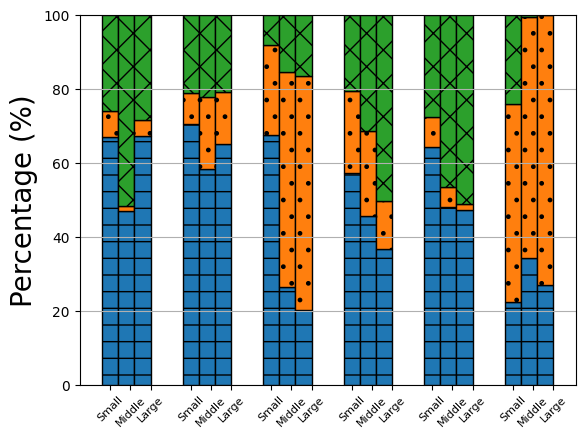

(77.38959920341603, 76.86672302056917, 60.49915507604315, 65.05428807036834, 72.29591836734693, 25.809303590859628) (10.274344986835594, 15.995115995115993, 32.72672126175311, 15.161489829576691, 11.020408163265307, 46.78318824809576) (12.336055809748379, 7.13816098431483, 6.774123662203735, 19.784222100054976, 16.683673469387756, 27.407508161044614)
(53.084873994352385, 64.34694050751082, 60.98551323079041, 64.9508786495088, 47.777189732733525, 21.88330591064422) (5.706217699397944, 2.5799881184757703, 22.593854306458827, 4.849868548498685, 1.587721619476052, 71.52259207695228) (41.20890830624967, 33.07307137401341, 16.420632462750763, 30.199252801992525, 50.63508864779042, 6.594102012403494)
(59.617663499161544, 2.564102564102564, 39.69247516668935, 49.60118168389956, 0, 0) (2.222470653996646, 0, 35.07960266702953, 8.951255539143279, 2.684563758389262, 100.0) (38.15986584684181, 97.43589743589743, 25.227922166281125, 41.44756277695716, 97.31543624161074, 0)


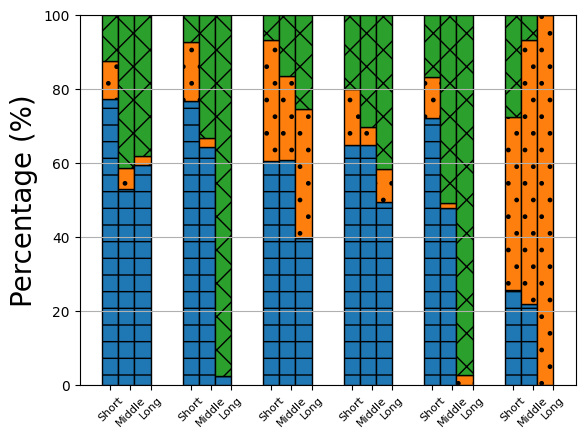

In [40]:
def plot_status_over(run_time=False):
    plt.style.use("default")
    traces = ("bw", "mira", "philly", "helios", "theta", "theta_gpu")
    if run_time:
        bw = [[77.38959920341603, 10.274344986835594, 12.336055809748379],
 [53.084873994352385, 5.706217699397944, 41.20890830624967],
 [59.617663499161544, 2.222470653996646, 38.15986584684181]]
        mira = [[76.86672302056917, 15.995115995115993, 7.13816098431483],
 [64.34694050751082, 2.5799881184757703, 33.07307137401341],
 [2.564102564102564, 0, 97.43589743589743]]
        philly = [[60.49915507604315, 32.72672126175311, 6.774123662203735],
 [60.98551323079041, 22.593854306458827, 16.420632462750763],
 [39.69247516668935, 35.07960266702953, 25.227922166281125]]
        hl = [[65.05428807036834, 15.161489829576691, 19.784222100054976],
 [64.9508786495088, 4.849868548498685, 30.199252801992525],
 [49.60118168389956, 8.951255539143279, 41.44756277695716]]
        th = [[72.29591836734693, 11.020408163265307, 16.683673469387756],
 [47.777189732733525, 1.587721619476052, 50.63508864779042],
 [0, 2.684563758389262, 97.31543624161074]]
        th_gpu = [[25.809303590859628, 46.78318824809576, 27.407508161044614],
 [21.88330591064422, 71.52259207695228, 6.594102012403494],
 [0, 100.0, 0]]
        z = ["Short","Middle","Long"]

    else:
        bw = [[67.00871394770195, 7.114774934564608, 25.876511117733443],
     [47.096774193548384, 1.2903225806451613, 51.61290322580645],
     [67.36842105263158, 4.2105263157894735, 28.421052631578945]]
        mira = [[70.73658165207462, 8.288922725542443, 20.974495622382946],
     [58.49765258215962, 19.342723004694836, 22.15962441314554],
     [65.33957845433255, 13.817330210772832, 20.843091334894616]]
        philly = [[67.6981199964019, 24.18899801287136, 8.112881990726734],
     [26.483950799689726, 58.283160344254426, 15.232888856055848],
     [20.27687296416938, 63.27361563517915, 16.449511400651463]]
        hl = [[57.48994568597371, 21.9826692648949, 20.527385049131393],
     [45.79295637720701, 22.9936964907329, 31.213347132060086],
     [36.688236653570605, 13.173099144904091, 50.13866420152531]]
        th = [[64.4215076529487, 8.045520709276168, 27.532971637775134],
 [48.06763285024155, 5.555555555555555, 46.3768115942029],
 [47.35099337748344, 1.6556291390728477, 50.993377483443716]]
        th_gpu = [[22.512866769247093, 53.446171804531225, 24.04096142622168],
 [34.30376270255424, 65.14693765449053, 0.549299642955232],
 [27.11864406779661, 72.88135593220339, 0]]
        z = ["Small","Middle","Large"]
        status = {
            'Small': (15.61, 12.22, 5.68, 0.3, 4.28, 1.28),
            'Middle': (143.62, 50.96, 15.84, 0.4, 30.98, 1.28),
            'Large': (53.33, 42.83, 13.26, 0.53, 159.76, 5.23),
        }

    x = np.arange(len(traces))  # the label locations
    width = 0.20  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots()
    hatches= ["-", ".", "x", "-", '--', "o"]
    colors=['#1f77b4', '#ff7f0e', '#2ca02c']
    for i, (measurement) in enumerate(zip(bw, mira, philly, hl, th, th_gpu)):
        offset = width * multiplier
        prev = np.array([0.0]*6)
        print(*zip(*measurement))
        for k, j in enumerate(zip(*measurement)):
            rects = ax.bar(x + offset, j, width, hatch=hatches[k], color=colors[k], edgecolor='black', bottom=prev)
            prev += np.array(j)
        multiplier += 1

    ax.set_ylabel('Percentage (%)', fontsize=20)

    ax.set_xticks(np.delete(np.arange(24)*0.25, [3,7,11,15,19,23]), 6*z, fontsize=8, rotation=45)
    plt.grid(axis="y")
    plt.show()
plot_status_over()
plot_status_over(True)

# UBC - Users' Repeated Behaviour 


In [41]:
from collections import defaultdict
from bisect import bisect
def plot_groups(data, col):
    d = {}
    g = {}
    for index, row in data.iterrows():
        if row["user"] not in d:
            d[row["user"]] = defaultdict(list)
            g[row["user"]] = defaultdict(list)
        d[row["user"]][row[col]].append([row["run_time"], row[col]*row["run_time"]])
    
    for i in d:
        for j in d[i]:
            d[i][j].sort()
            for k in range(1, len(d[i][j])):
                d[i][j][k][1] += d[i][j][k-1][1]
            index = 0
            while index < len(d[i][j]):
                new_index = bisect(d[i][j], [d[i][j][index][0]*1.2, 0])
                if index >= 1:
                    g[i][j].append([d[i][j][index], d[i][j][new_index-1][1]-d[i][j][index-1][1]])
                else:
                    g[i][j].append([d[i][j][index], d[i][j][new_index-1][1]])
                index = new_index
    s = 0
    a = [0]*10
    for i in g:
        t = 0
        for j in g[i]:
            g[i][j].sort(key=lambda x:-x[1])
            t += len(g[i][j])
            for k in range(10):
                if k < len(g[i][j]):
                    a[k] += g[i][j][k][1]
        s += t
    for i in range(1, 10):
        a[i] += a[i-1]
    print(list(np.array(a)/(data[col]*data["run_time"]).sum()))
#         print(i, t)
    print(s/len(g), len(data)/len(set(data["user"])))

In [42]:
plot_groups(mira_df_2, "cpu_num")

[0.6918350088912488, 0.8533482445948762, 0.921081711512026, 0.9533918131448507, 0.9710197995695022, 0.9810033596267114, 0.9872495542508333, 0.9916599140171835, 0.9944420135092896, 0.9964546220465884]
15.15 140.675


In [43]:
plot_groups(bw_df, "cpu_num")

[0.6194840399786984, 0.7729370934866642, 0.8425218118648454, 0.8906973579175446, 0.9238788917664792, 0.9479635533005115, 0.9659413769736639, 0.9788211703158228, 0.9842781315514204, 0.987734831866639]
40.14468864468864 656.7326007326008


In [44]:
plot_groups(sc_df, "cpu_num")

[0.3425449121803357, 0.5011493382960683, 0.6061926043200405, 0.6804210712592412, 0.73688249734531, 0.781803925903025, 0.8181606623414925, 0.8478007174679538, 0.8724569694064028, 0.8932016520137196]
37.26039387308534 866.3326039387308


In [45]:
plot_groups(philly_df, "gpu_num")

[0.28569096620357964, 0.4384045247520146, 0.545916628344075, 0.6263372405355048, 0.6897181499719287, 0.7429051624867624, 0.7877784887121456, 0.8257544812862695, 0.8583802658301265, 0.8858856158005057]
32.275862068965516 475.91222570532915


In [46]:
plot_groups(hl_df, "gpu_num")

[0.3412589175944932, 0.5253771632298813, 0.6401852895114848, 0.7268169396811582, 0.7918618794877094, 0.8394237557838181, 0.8733033543091736, 0.9005927265133411, 0.9214560290971314, 0.9370205635505027]
55.42622950819672 669.5040983606557


In [47]:
plot_groups(th_df, "cpu_num")

[0.7518056020202507, 0.8558925637313898, 0.899646125474168, 0.9293387269242847, 0.9477965077320011, 0.9625355964106591, 0.9713036041859342, 0.9774447097600966, 0.9824553576493343, 0.9861430093312263]
45.84 467.74


In [48]:
plot_groups(th_gpu_df, "gpu_num")

[0.5456415087066954, 0.6540775322952421, 0.736053563391097, 0.7961297625424151, 0.8294600959018047, 0.8593692636586076, 0.8821934734113498, 0.9031370845055565, 0.9197546224720765, 0.9343792133174184]
18.78846153846154 434.7307692307692


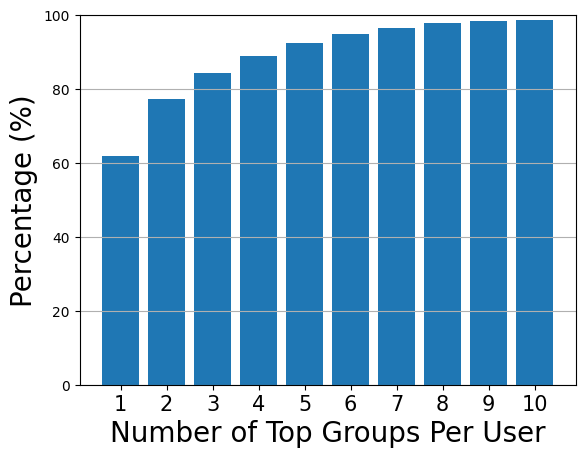

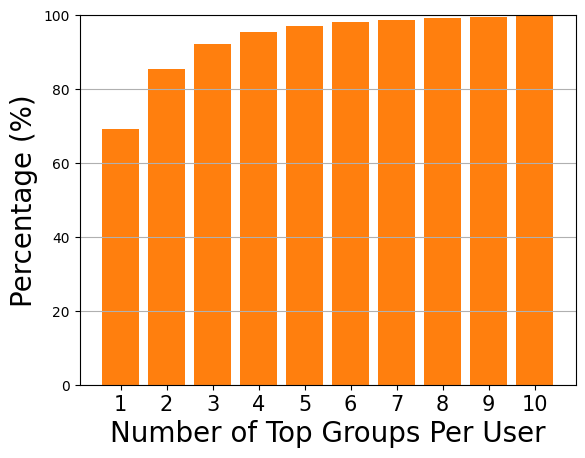

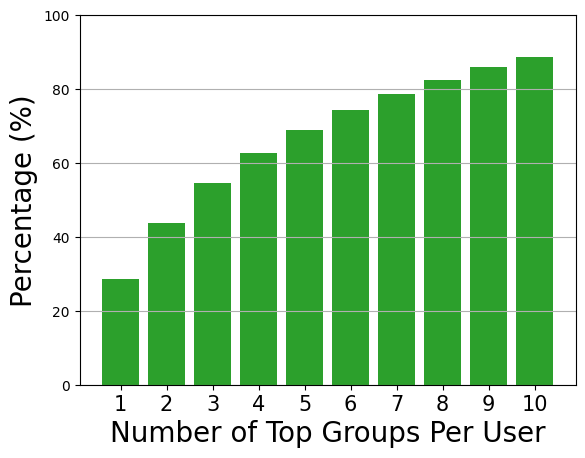

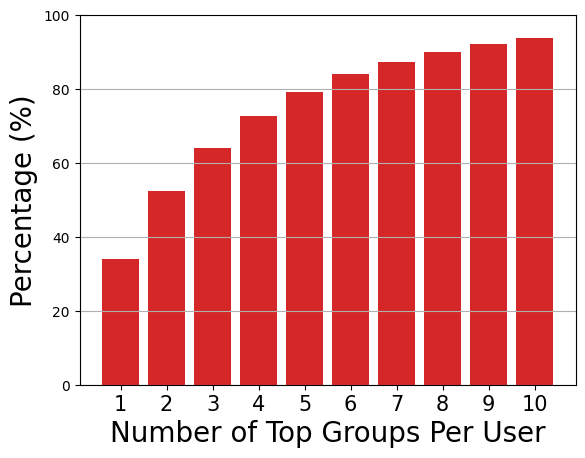

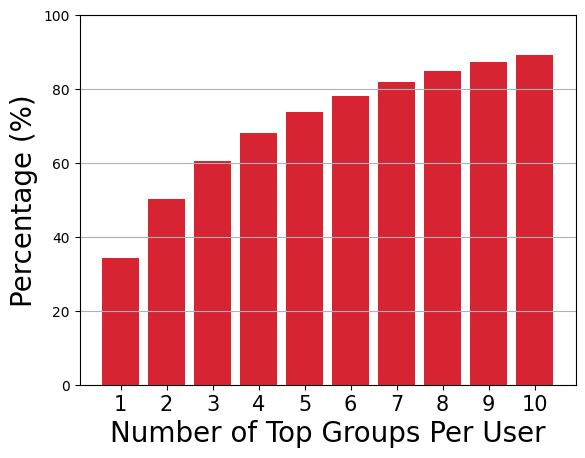

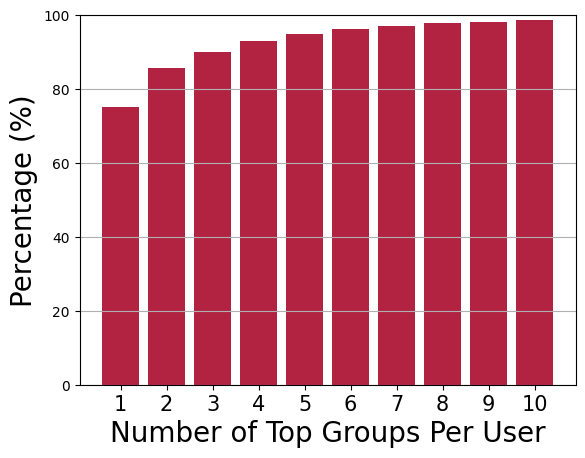

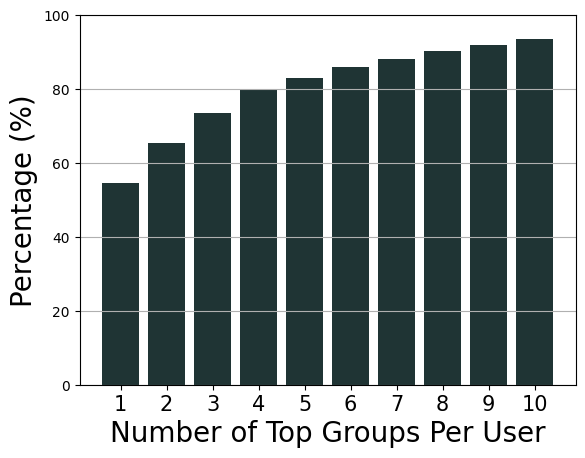

In [49]:
def plot_123(a, color):
    plt.grid(axis="y")

    plt.bar(list(range(1, 11)), np.array(a)*100, color=color)
    plt.ylabel('Percentage (%)', fontsize=20)
    plt.xlabel('Number of Top Groups Per User', fontsize=20)
#     ax.set_title('Penguin attributes by species')
    plt.xticks(list(range(1, 11)), list(range(1, 11)), fontsize=15)
#     plt.legend(fontsize=15)
    plt.ylim(0, 100)
    plt.show()
    
a =[0.6194840399786984, 0.7729370934866642, 0.8425218118648454, 0.8906973579175446, 0.9238788917664792, 0.9479635533005115, 0.9659413769736639, 0.9788211703158228, 0.9842781315514204, 0.987734831866639]
b =[0.6918350088912488, 0.8533482445948762, 0.921081711512026, 0.9533918131448507, 0.9710197995695022, 0.9810033596267114, 0.9872495542508333, 0.9916599140171835, 0.9944420135092896, 0.9964546220465884]
c =[0.28569096620357964, 0.4384045247520146, 0.545916628344075, 0.6263372405355048, 0.6897181499719287, 0.7429051624867624, 0.7877784887121456, 0.8257544812862695, 0.8583802658301265, 0.8858856158005057]
d = [0.3412589175944932, 0.5253771632298813, 0.6401852895114848, 0.7268169396811582, 0.7918618794877094, 0.8394237557838181, 0.8733033543091736, 0.9005927265133411, 0.9214560290971314, 0.9370205635505027]
e = [0.3425449121803357, 0.5011493382960683, 0.6061926043200405, 0.6804210712592412, 0.73688249734531, 0.781803925903025, 0.8181606623414925, 0.8478007174679538, 0.8724569694064028, 0.8932016520137196]
f = [0.7518056020202507, 0.8558925637313898, 0.899646125474168, 0.9293387269242847, 0.9477965077320011, 0.9625355964106591, 0.9713036041859342, 0.9774447097600966, 0.9824553576493343, 0.9861430093312263]
g = [0.5456415087066954, 0.6540775322952421, 0.736053563391097, 0.7961297625424151, 0.8294600959018047, 0.8593692636586076, 0.8821934734113498, 0.9031370845055565, 0.9197546224720765, 0.9343792133174184]
x = [a,b,c,d,e,f,g]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', "#d62432", "#b22342", "#1f3434"]

for i, j in zip(x, colors):
    plot_123(i,j)    
    

# JGC - Job Waiting Time - Avg wait time 
 

In [50]:
# bw-cpu: <32, 32~192, >192
# mira: 8192.0, 16384.0
# philly: =1, >1
# helios: =1, >1
bw_df["gpu_num"].quantile(100/100)

4228.0

In [51]:
def plot_cdf_util(x, y, xlabel, ylabel="Frequency (%)",color="", linestyle="--"):
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16) 
    y = np.array(y)
    cdf = 100*y/y.sum()
    if color:
        plt.plot(x, cdf, linestyle=linestyle, linewidth=5, color=color)
    else:
        plt.plot(x, cdf, linestyle=linestyle, linewidth=5)
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.margins(0)
    plt.ylim(0, 100)
    plt.grid(True)

In [52]:
def plot_size_util(data, a, b, col="cpu_num"):
    data = data.copy()
    data["core_hour"] = data.apply(lambda row: row[col]*row["run_time"], axis=1)
    data = data[data[col]!=0]
    data_a = data[data[col]<=a]
    data_b = data[(data[col]>a) & (data[col]<=b)]
    data_c = data[data[col]>b]
    s = data["core_hour"].sum()
    print(data_a["core_hour"].sum()/s, data_b["core_hour"].sum()/s, data_c["core_hour"].sum()/s)
    
def plot_runtime_util(data, a, b, col="cpu_num"):
    data = data.copy()
    data["core_hour"] = data.apply(lambda row: row[col]*row["run_time"], axis=1)
    data = data[data[col]!=0]
    data_a = data[data["run_time"]<=a]
    data_b = data[(data["run_time"]>a) & (data["run_time"]<=b)]
    data_c = data[data["run_time"]>b]
    s = data["core_hour"].sum()
    print(data_a["core_hour"].sum()/s, data_b["core_hour"].sum()/s, data_c["core_hour"].sum()/s)

## cores

In [53]:
plot_size_util(bw_df, 22636*32//10, 3*22636*32//10)

0.8621423238064212 0.04481752861242556 0.09304014758115327


In [54]:
plot_size_util(mira_df_2, 49152*16//10, 3*49152*16//10)

0.3411881311390447 0.4663087544440705 0.1925031144168848


In [55]:
plot_size_util(sc_df, 32000//10, 3*32000//10)

0.9965424878763479 0.003457512123652057 0.0


In [56]:
plot_size_util(philly_df, 1, 8, col="gpu_num")

0.18481045448312355 0.6886604459099681 0.12652909960690828


In [57]:
plot_size_util(hl_df, 1, 8, col="gpu_num")

0.04568505506303716 0.37927467415543625 0.5750402707815265


In [58]:
plot_size_util(th_df, 281088//10, 3*281088//10)

0.17429352665988634 0.4812716054943127 0.3444348678458009


In [59]:
plot_size_util(th_gpu_df, 1, 8, col="gpu_num")

0.5325451144201067 0.3876709786765183 0.07978390690337511


## run time

In [60]:
plot_runtime_util(bw_df, 3600, 3600*24)

0.017430919037431256 0.6207234657441186 0.3618456152184501


In [61]:
plot_runtime_util(mira_df_2, 3600, 3600*24)

0.047029823384298675 0.8124005341263553 0.14056964248934609


In [62]:
plot_runtime_util(sc_df, 3600, 3600*24)

0.027796924431945414 0.32194541449577674 0.6502576610722779


In [63]:
plot_runtime_util(philly_df, 3600, 3600*24, col="gpu_num")

0.011747226083204582 0.14327646330814822 0.8449763106086472


In [64]:
plot_runtime_util(hl_df, 3600, 3600*24,col="gpu_num")

0.01967755349409303 0.2228495442384417 0.7574729022674653


In [65]:
plot_runtime_util(th_df, 3600, 3600*24)

0.022257144311888483 0.7847446106080309 0.19299824508008057


In [66]:
th_gpu_df["core_hour"] = th_gpu_df["gpu_num"] * th_gpu_df["run_time"]


In [67]:
plot_runtime_util(th_gpu_df, 3600, 3600*24, col="gpu_num")

0.055959039149456095 0.9433836109411401 0.0006573499094039204


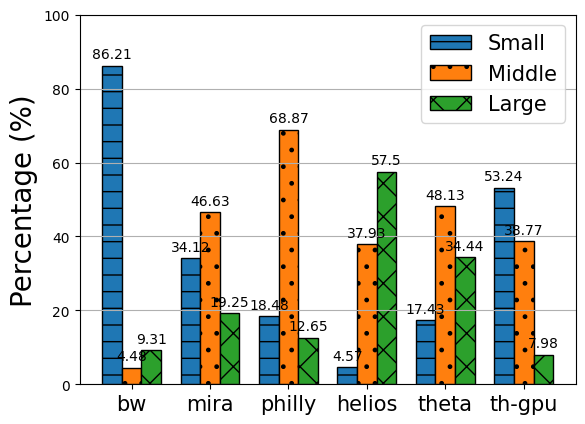

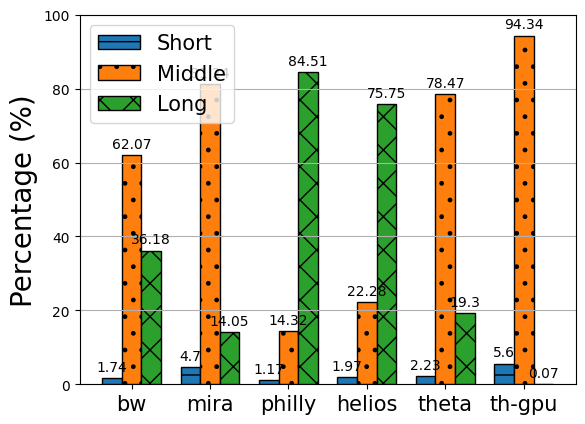

In [68]:
def plot_percentage_corehour(run_time=False):
    plt.style.use("default")
    traces = ("bw", "mira", "philly", "helios", "theta", "th-gpu")
    if run_time:
        status = {
            'Short': (1.74, 4.70, 1.17, 1.97, 2.23, 5.60),
            'Middle': (62.07, 81.24, 14.32, 22.28, 78.47, 94.34),
            'Long': (36.18, 14.05, 84.51, 75.75, 19.30,0.07),
        }
    else:
        status = {
            'Small': (86.21, 34.12, 18.48, 4.57, 17.43, 53.24),
            'Middle': (4.48, 46.63, 68.87, 37.93, 48.13, 38.77),
            'Large': (9.31, 19.25, 12.65, 57.50, 34.44, 7.98),
        }
        
    x = np.arange(len(traces))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots()
    hatches= ["-", ".", "x", "-", "o"]
    for i, (attribute, measurement) in enumerate(status.items()):
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute, hatch=hatches[i], edgecolor='black')
        ax.bar_label(rects, padding=3)
        multiplier += 1
    ax.set_ylabel('Percentage (%)', fontsize=20)
    ax.set_xticks(x + width, traces, fontsize=15)
    ax.legend(fontsize=15)
    ax.set_ylim(0, 100)
    plt.grid(axis="y")
    plt.show()
plot_percentage_corehour()
plot_percentage_corehour(True)

# JFC - Job Failures Distribution

In [69]:
a = hl_df.groupby("state")["core_hour"].sum()
a/a.sum()*100

state
Failed     6.635605
Killed    40.943660
Pass      52.420735
Name: core_hour, dtype: float64

In [70]:
hl_df["state"].replace({ 'COMPLETED' : "Pass", 'FAILED' : "Failed", 'CANCELLED' : "Killed", "NODE_FAIL":"Failed","TIMEOUT":"Failed"}, inplace=True)

In [71]:
a = philly_df.groupby("state")["core_hour"].sum()
a/a.sum()*100

state
Failed    33.405257
Killed    32.818374
Pass      33.776369
Name: core_hour, dtype: float64

In [72]:
a = bw_df.groupby("new_status")["node_hour"].sum()
a/a.sum()*100

new_status
Failed     4.905878
Killed    41.454704
Pass      53.639418
Name: node_hour, dtype: float64

In [73]:
bw_df["new_status"].replace({ 'NM' : "Pass", 'SIGABRT' : "Failed", 'SIGTERM' : "Killed", 'SIGKILL' : "Killed", "SIGSEGV":"Failed","Unknown":"Failed"}, inplace=True)

In [74]:
a = mira_df_2.groupby("new_status")["node_hour"].sum()
a/a.sum()*100

new_status
Failed     5.769631
Killed    37.286633
Pass      56.943736
Name: node_hour, dtype: float64

In [75]:
mira_df_2["new_status"].replace({ 'NM' : "Pass", 'SIGABRT' : "Failed", 'SIGTERM' : "Killed", 'SIGKILL' : "Killed", "SIGSEGV":"Failed","Unknown":"Failed"}, inplace=True)

In [76]:
a = th_df.groupby("new_status")["node_hour"].sum()
a/a.sum()*100

new_status
Failed     3.677359
Killed    43.362935
Pass      52.959706
Name: node_hour, dtype: float64

In [77]:
a = th_gpu_df.groupby("new_status")["node_hour"].sum()
a/a.sum()*100

new_status
Failed    66.374743
Killed     5.419667
Pass      28.205590
Name: node_hour, dtype: float64

In [78]:
def percentage_of_status(data, col="state"):
    return data[col].value_counts(normalize=True) * 100

In [79]:
percentage_of_status(hl_df)

state
Pass      64.724931
Killed    21.154635
Failed    14.120434
Name: proportion, dtype: float64

In [80]:
percentage_of_status(philly_df)

state
Pass      59.581335
Failed    30.901223
Killed     9.517442
Name: proportion, dtype: float64

In [81]:
percentage_of_status(bw_df, col="new_status")

new_status
Pass      64.995426
Killed    27.647416
Failed     7.357157
Name: proportion, dtype: float64

In [82]:
percentage_of_status(mira_df_2, col="new_status")

new_status
Pass      70.055092
Killed    21.028079
Failed     8.916830
Name: proportion, dtype: float64

In [83]:
percentage_of_status(th_df, col="new_status")

new_status
Pass      63.911575
Killed    28.169496
Failed     7.918929
Name: proportion, dtype: float64

In [84]:
percentage_of_status(th_gpu_df, col="new_status")

new_status
Failed    55.432186
Pass      24.435990
Killed    20.131823
Name: proportion, dtype: float64

In [85]:
%load_ext autoreload
%autoreload 2

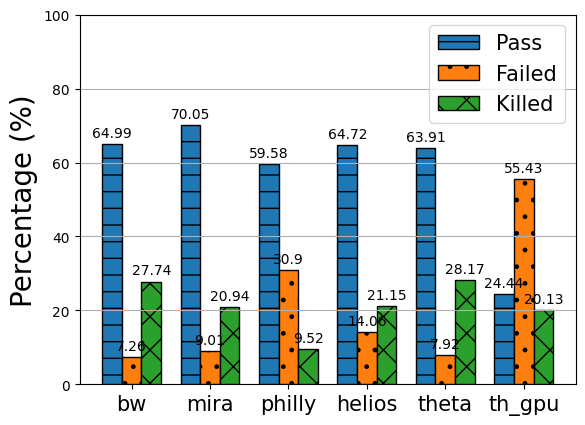

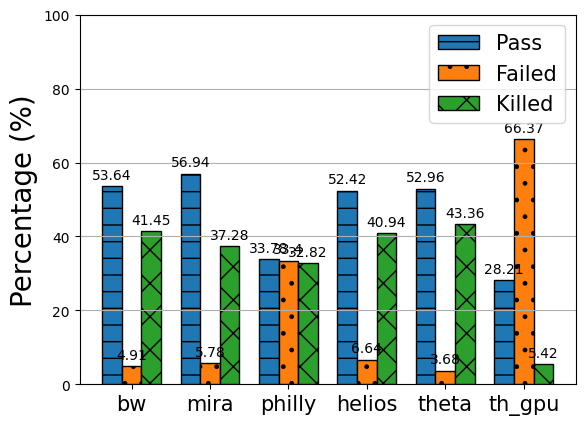

In [86]:


from matplotlib import pyplot as plt
def plot_percentage_status(job_counts=True):
    plt.style.use("default")
    traces = ("bw", "mira", "philly", "helios", "theta", "th_gpu")
    if job_counts:
        status = {
            'Pass': (64.99, 70.05, 59.58, 64.72, 63.91, 24.44),
            'Failed': (7.26, 9.01, 30.90, 14.06, 7.92, 55.43),
            'Killed': (27.74, 20.94, 9.52, 21.15, 28.17, 20.13),
        }
    # core hoursPass     
    else:
        status = {
            'Pass': (53.64, 56.94, 33.78, 52.42, 52.96, 28.21),
            'Failed': (4.91, 5.78, 33.40, 6.64, 3.68, 66.37),
            'Killed': (41.45, 37.28, 32.82, 40.94, 43.36, 5.42),
        }

    x = np.arange(len(traces))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots()
    hatches= ["-", ".", "x", "-"]
    for i, (attribute, measurement) in enumerate(status.items()):
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute, hatch=hatches[i], edgecolor='black')
        ax.bar_label(rects, padding=3)
        multiplier += 1
    ax.set_ylabel('Percentage (%)', fontsize=20)
    ax.set_xticks(x + width, traces, fontsize=15)
    ax.legend(fontsize=15)
    ax.set_ylim(0, 100)
    plt.grid(axis="y")
    plt.show()
plot_percentage_status()
plot_percentage_status(False)

# JGC - System utilization and resource occupation

In [87]:
def plot_util(data, total_nodes, key="node_num", color='b'):
    data = data.copy()
    start_time = list(data["submit_time"])[0]
    end_time = list(data["submit_time"])[-1]
    duration = end_time - start_time
    days = int(duration/(24*3600))
    days_usage = [0]*days
    data["start_time"] = data.apply(lambda row: row["submit_time"] + row["wait_time"]-start_time, axis=1)
    data["end_time"] = data.apply(lambda row: row["start_time"] + row["run_time"], axis=1)
    data["start_day"] = data.apply(lambda row: int(row["start_time"]/(24*3600)), axis=1)
    data["end_day"] = data.apply(lambda row: int(row["end_time"]/(24*3600))+1, axis=1)
    for index, row in data.iterrows():
        for i in range(int(row["start_day"]), int(row["end_day"])):
            if i <len(days_usage):
                days_usage[i] += row[key]*(min(row["end_time"], (i+1)*24*3600)-max(row["start_time"], i*24*3600))
    print(np.mean(np.array(days_usage)/(total_nodes*24*3600)))
    plt.bar(range(len(days_usage)), 100*np.array(days_usage)/(total_nodes*24*3600), color=color)
    plt.plot([-10, 150], [80]*2, color="black", linestyle="--")
    plt.ylim([0, 100])
    plt.xlim([-5, 121])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    plt.xlabel("Time (Days)", fontsize=26)
    plt.ylabel("System Utilization(%)", fontsize=26)

def plot_wait(data, total_nodes, key="node_num", color='b'):
    data = data.copy()
    start_time = list(data["submit_time"])[0]
    end_time = list(data["submit_time"])[-1]
    duration = end_time - start_time
    days = int(duration/(24*3600))
    days_usage = [0]*days
    data["start_time"] = data.apply(lambda row: row["submit_time"] + row["wait_time"]-start_time, axis=1)
    data["end_time"] = data.apply(lambda row: row["start_time"] + row["run_time"], axis=1)
    data["start_day"] = data.apply(lambda row: int(row["start_time"]/(24*3600)), axis=1)
    data["end_day"] = data.apply(lambda row: int(row["end_time"]/(24*3600))+1, axis=1)
    c = [1]*days
    for index, row in data.iterrows():
        if row["start_day"]<days:
            days_usage[row["start_day"]] += row["wait_time"]
            c[row["start_day"]] += 1
    print(np.mean(np.array(days_usage)/np.array(c)))
    plt.bar(range(len(days_usage)), np.array(days_usage)/np.array(c), color=color)
    plt.xlabel("Time (Days)", fontsize=20)
    plt.ylabel("Average Wait Time (s)", fontsize=20)

0.3980970879706188


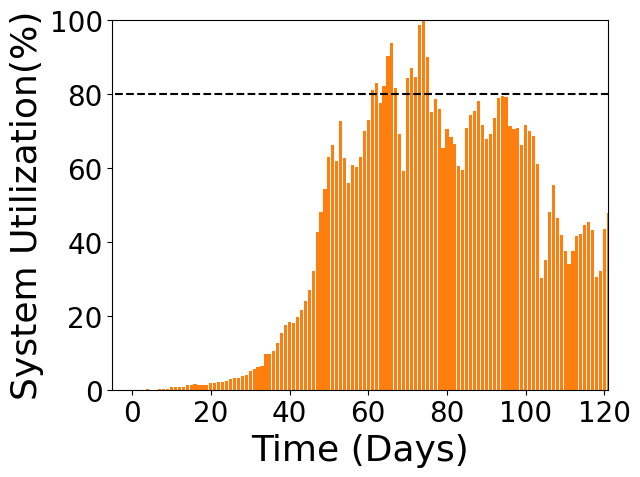

In [138]:
ppppp = pd.read_csv("lumos-site/data/philly_df_schedule.csv")
plot_util(ppppp, 2490, "gpu_num", color='#ff7f0e')

0.8613768690940143
786432.0
49152.0


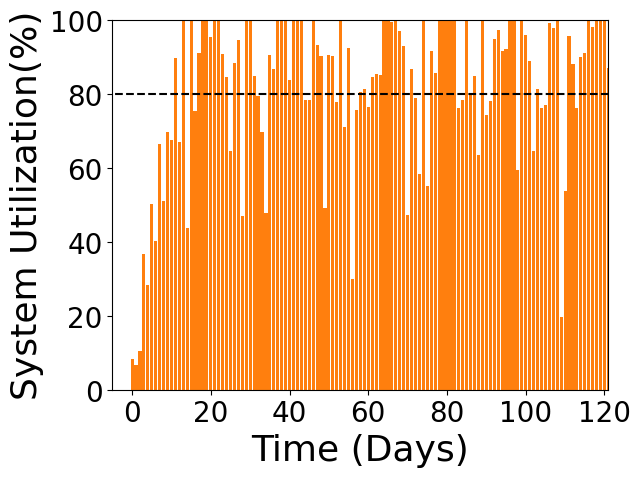

In [90]:
plot_util(mira_df_2, 49152, color='#ff7f0e')
print(mira_df_2["cpu_num"].max())
print(mira_df_2["node_num"].max())


0.8263228359514845


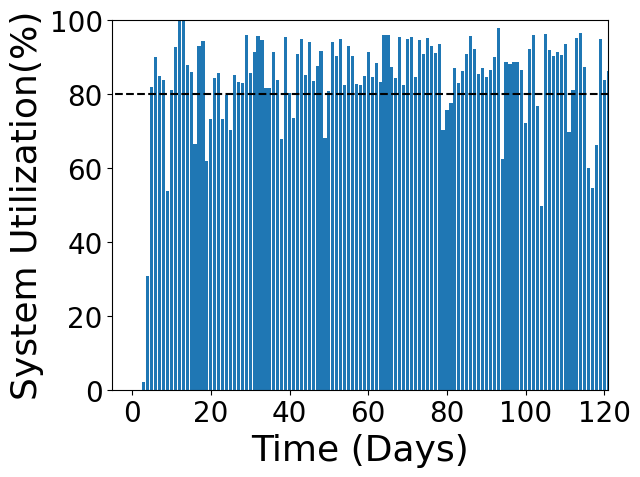

In [91]:
plot_util(bw_df[1000:], 22636*32, "cpu_num", color="#1f77b4")

0.811576689201619


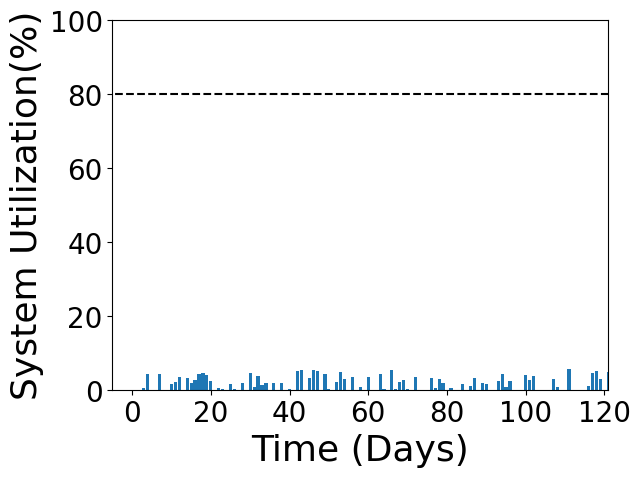

In [139]:
plot_util(bw_df[1000:], 4228, "gpu_num", color="#1f77b4")

0.4670332745746774


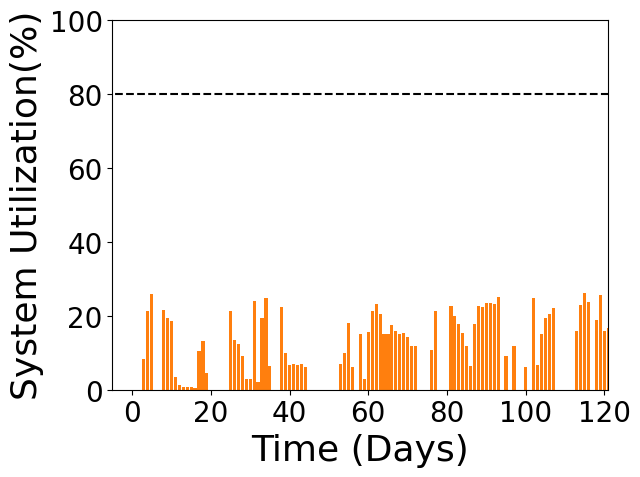

In [140]:
plot_util(sc_df, 891, color='#ff7f0e')

0.39782193486637185


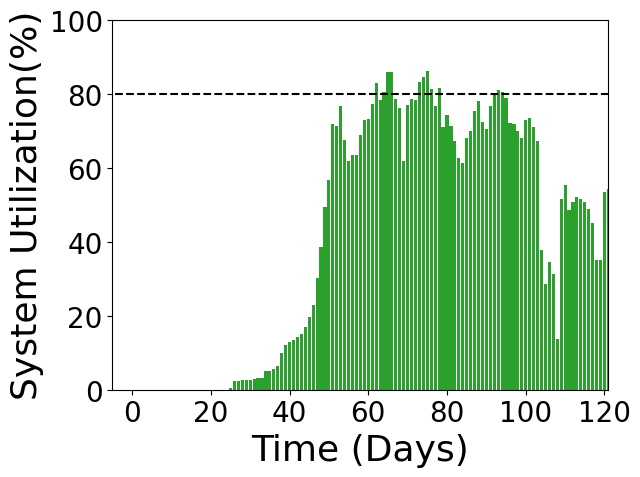

In [94]:
plot_util(philly_df, 2490, "gpu_num", color='#2ca02c')

0.7644415673059766


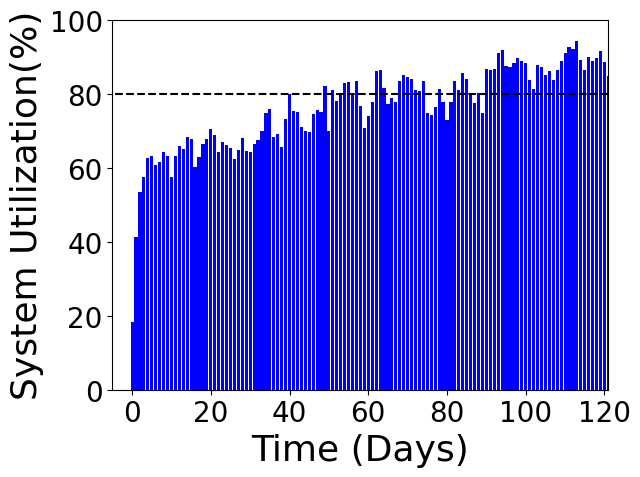

In [95]:
plot_util(hl_df, 1080, "gpu_num")

0.48256397882503693


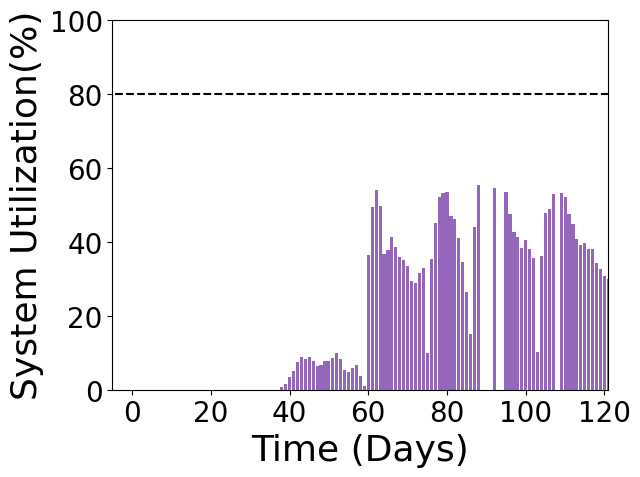

In [96]:
# This is total GPUs no the total no of nodes
plot_util(sc_df, 448, "gpu_num", color='#9467bd')

0.821595134333978


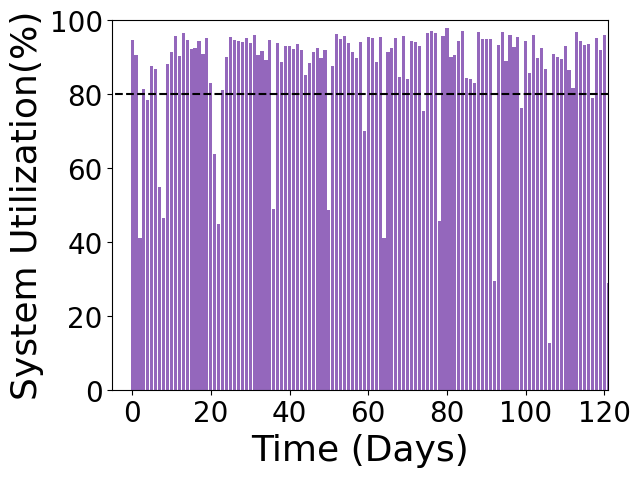

In [97]:
plot_util(th_df, 4392, color="#9467bc")

0.5059887839988426


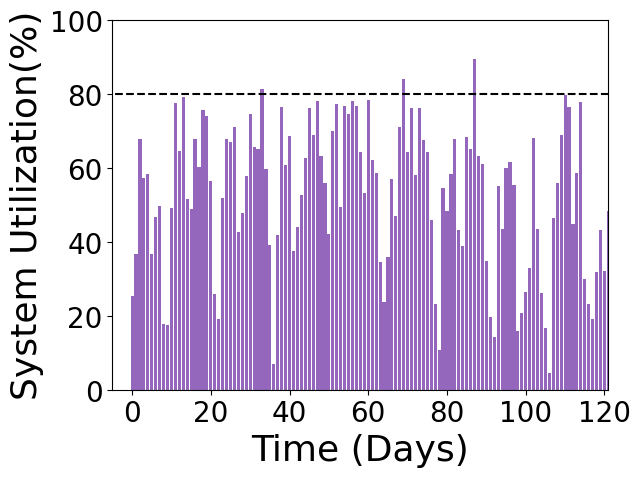

In [98]:
# Total nodes in the Theta GPU is 24

plot_util(th_gpu_df, 24, color="#9467bc")

In [99]:
 def plot_cdf(x, bins, xlabel, ylabel="Frequency (%)", color="", linestyle="--"):
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        x = np.sort(x)
        cdf = 100 * np.arange(len(x)) / float(len(x))
        if color:
            plt.plot(x, cdf, linestyle=linestyle, linewidth=5, color=color)
        else:
            plt.plot(x, cdf, linestyle=linestyle, linewidth=5)
        plt.xlabel(xlabel, fontsize=14)
        plt.ylabel(ylabel, fontsize=14)
        plt.margins(0)
        plt.ylim(0, 100) 
        plt.xlim(10**0, 10**8) 
        plt.grid(True)
        plt.style.use("default")

# Extra One 

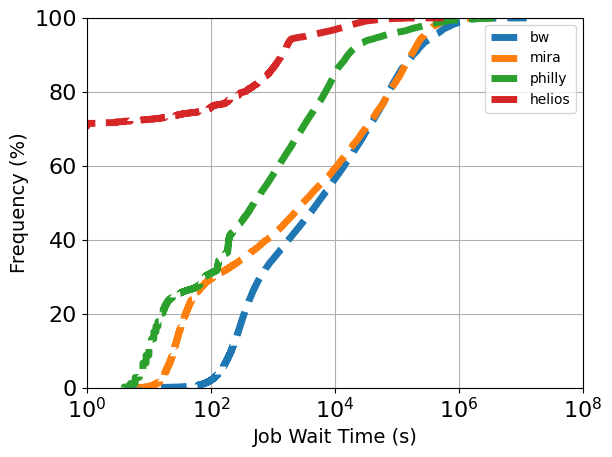

In [100]:
plot_cdf(bw_df["wait_time"], 100000, "Job Wait Time (s)")
plot_cdf(mira_df_2["wait_time"], 100000, "Job Wait Time (s)")
plot_cdf(philly_df[10000:130000]["wait_time"], 100000, "Job Wait Time (s)")
plot_cdf(hl_df["wait_time"], 100000, "Job Wait Time (s)")
plt.legend(["bw", "mira", "philly","helios"])
plt.xscale("log")

# UBC - Users's Submission Behaviours

In [101]:
from heapq import *
from collections import defaultdict, Counter
from matplotlib import pyplot as plt
import seaborn as sns
import bisect
import numpy as np
def analyze_util_and_user_behavior(data, total_nodes, gpu=False):
    queue = []
    # util, time, user
    util_time_user = defaultdict(list)
    util_node_user = defaultdict(list)
    util_time = []
    cur_util = 0
    for index, row in data.iterrows():
        row["start_time"] = row["submit_time"] + row["wait_time"]
        row["end_time"] = row["start_time"] + row["run_time"]
        row["index"] = index
        # only for helios
        total_nodes = gpu_num_total[bisect.bisect(gpu_date, row["submit_time"])-1]
        while queue and queue[0][0]<=row["submit_time"]:
            temp = heappop(queue)
            cur_time = temp[0]
            job_type = temp[1]
            job = temp[3]
            if job_type == "waiting":
                heappush(queue, (job["end_time"], "running", job["index"], job))
                cur_util += job["gpu_num"] if gpu else job["node_num"]
            elif job_type == "running":
                cur_util -= job["gpu_num"] if gpu else job["node_num"]
            else:
                raise NotImplementedError
            if util_time and util_time[-1][0] == cur_time:
                util_time[-1][1] = cur_util/total_nodes
            else:
                util_time.append([cur_time, cur_util/total_nodes])
        heappush(queue, (row["start_time"], "waiting", row["index"] , row))
        util_time_user[row["user"]].append([row["submit_time"], cur_util/total_nodes])
        util_node_user[row["user"]].append([row["gpu_num"] if gpu else row["node_num"], cur_util/total_nodes])
        if index % 10000 == 0:
            print(index)
    return util_time, util_time_user, util_node_user  

def analyze_queue_and_user_behavior(data, gpu=False):
    data = data.copy()
    data["index"] = data.index
    queue = []
    util_time_user = defaultdict(list)
    util_node_user = defaultdict(list)
    util_time = []
    cur_wait = 0
    for index, row in data.iterrows():
        start_time = row["submit_time"] + row["wait_time"]
        end_time = start_time + row["run_time"]
        while queue and queue[0][0]<=row["submit_time"]:
            temp = heappop(queue)
            cur_time = temp[0]
            job_type = temp[1]
            job = temp[3]
            if job_type == "waiting":
                heappush(queue, (job["submit_time"] + job["wait_time"]+job["run_time"], "running", job["index"], job))
                cur_wait -= 1
            elif job_type == "running":
                pass
            else:
                raise NotImplementedError
            util_time.append([cur_time, cur_wait])
        heappush(queue, (start_time, "waiting", index, row))
        util_time_user[row["user"]].append([row["run_time"], cur_wait])
        util_node_user[row["user"]].append([row["gpu_num"] if gpu else row["node_num"], cur_wait])
        cur_wait += 1
        if index % 10000 == 0:
            print(index)
    return util_time, util_time_user, util_node_user 

def plot_util_node(un, data, bars, user="per", xlabel="mira"):
    hatches= ["-", ".", "x", "-"]
    if user == "per":
        users = list(data.groupby("user").count().sort_values(by="job", ascending=False).index[:6])
        stride = 0.2
        fig, axes = plt.subplots(2, 3, figsize=(18, 10))

        for ui, user in enumerate(users):
            print(ui, user)

            x = ["{:.0%}".format((1+index)*stride)
                                      for index in range(int(1/stride))]
            buckets = [Counter() for _ in range(int(1/stride))]
            for node, util in un[user]:
                b = int(min(1/stride-1, util/stride))
                buckets[b][node] += 1
            for i in buckets:
                s = sum(i.values())
                for j in i:
                    i[j] /= s
            prevy = np.array([0]*len(x))
            prev_bar = -1
            for bar in bars:
                y = np.array([sum(i[j] for j in i.keys() if prev_bar<j <=bar) for i in buckets])
                axes[ui//3, ui%3].bar(x, y, bottom=prevy)
                prevy = y+prevy
                prev_bar = bar
            axes[ui//3, ui%3].legend(bars)
    else:
        all_un = []
        for i in un:
            all_un.extend(un[i])
        max_wait = max(all_un, key=lambda x: x[1])[1]
        stride = 1/3
        fig, axes = plt.subplots(1, 1, figsize=(3, 5))

        x = ["{}".format((1+index)*stride*max_wait)
                                  for index in range(int(1/stride))]
        buckets = [Counter() for _ in range(int(1/stride))]
        for node, util in all_un:
            b = int(min(1/stride-1, (util/max_wait)/stride))
            buckets[b][node] += 1
        for i in buckets:
            i[0] = 0
            s = sum(list(i.values()))
            for j in i:
                i[j] /= s*0.01
        prevy = np.array([0]*len(x))
        prev_bar = -1
        for index, bar in enumerate(bars):
            y = np.array([sum(i[j] for j in i.keys() if prev_bar<j <=bar) for i in buckets])
            axes.bar(x, y, bottom=prevy, hatch=hatches[index], edgecolor="black")
            prevy = y+prevy
            prev_bar = bar
        axes.set_xticks(x, ["Short Queue", "Middle Queue", "Long Queue"], rotation=45)
        axes.set_xlabel(xlabel, fontsize=20)
        axes.set_ylabel("Percentage (%)", fontsize=20)
    

In [102]:
mira_queue_time, mira_queue_time_user, mira_queue_node_user = analyze_queue_and_user_behavior(mira_df_2, gpu=False)

0
10000
20000


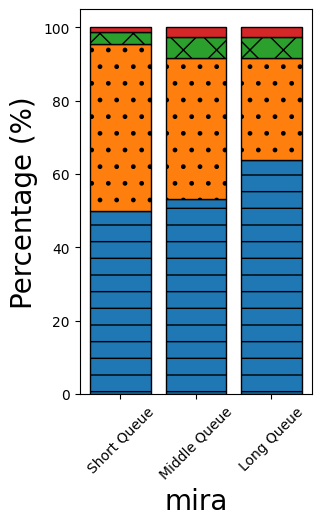

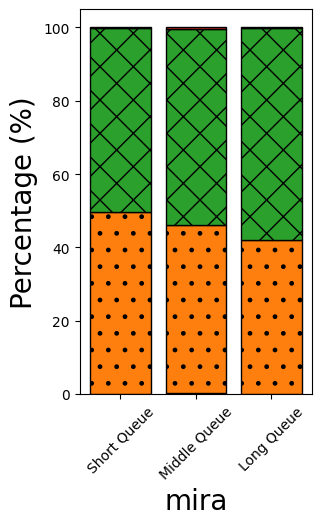

In [103]:
bars = [ 512, 49152//10, 3*49152//10, 49152]
plot_util_node(mira_queue_node_user, mira_df_2, bars, "all", "mira")
bars = [60, 3600, 3600*24, 100000000]
plot_util_node(mira_queue_time_user, mira_df_2, bars, "all", "mira")

In [104]:
bw_queue_time, bw_queue_time_user,bw_queue_node_user = analyze_queue_and_user_behavior(bw_df, gpu=False)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000


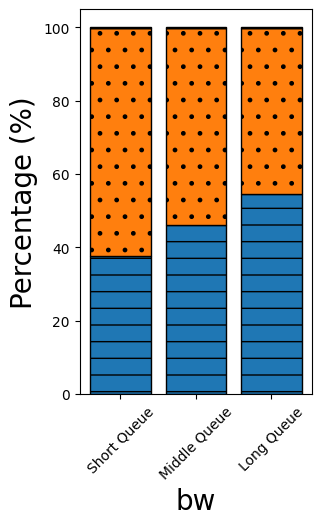

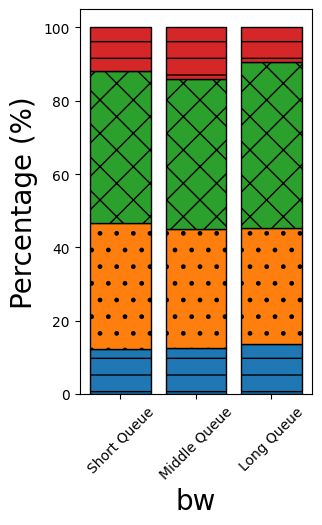

In [105]:
bars = [1, 22636//10, 3*22636//10, 1000000]
plot_util_node(bw_queue_node_user, bw_df, bars, "all", "bw")
bars = [60, 3600, 3600*24, 1000000000]
plot_util_node(bw_queue_time_user, bw_df, bars, "all", "bw")

In [106]:
sc_df["node_num"].max()

891

In [107]:
sc_queue_time, sc_queue_time_user, sc_queue_node_user = analyze_queue_and_user_behavior(sc_df, gpu=False)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000


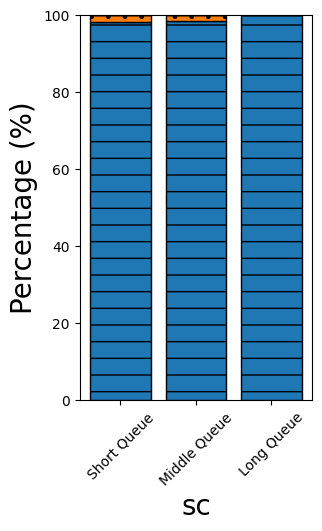

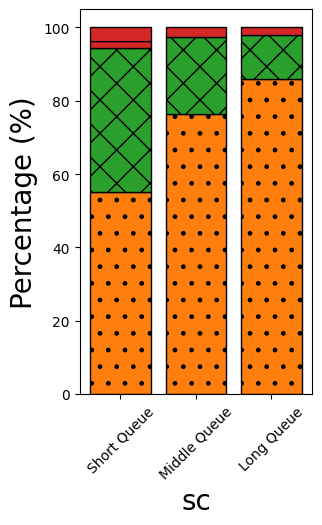

In [108]:
bars = [1, 891//10, 3*891//10, 891]
plot_util_node(sc_queue_node_user, sc_df, bars, "all", "sc")
bars = [60, 3600, 3600*24, 1000000000]
plot_util_node(sc_queue_time_user, sc_df, bars, "all", "sc")

In [109]:
th_queue_time, th_queue_time_user, th_queue_node_user = analyze_queue_and_user_behavior(th_df, gpu=False)

0
10000
20000


In [110]:
th_df['node_num'].max()

4392.0

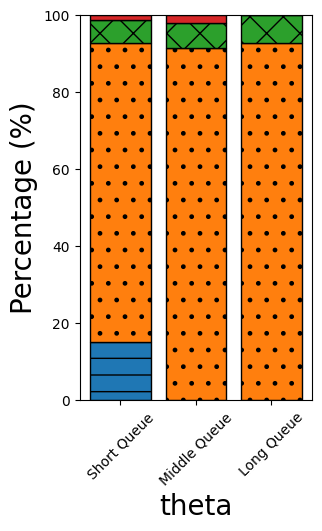

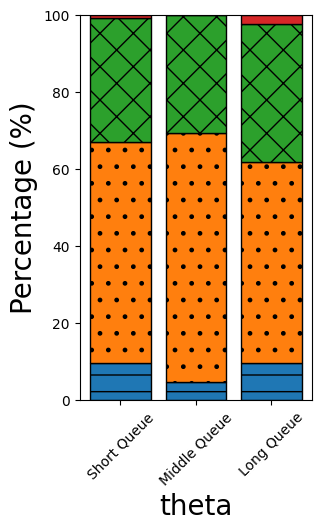

In [111]:
bars = [1, 4392//10, 3*4392//10, 4392]
plot_util_node(th_queue_node_user, th_df, bars, "all", "theta")
bars = [60, 3600, 3600*24, 1000000000]
plot_util_node(th_queue_time_user, th_df, bars, "all", "theta")

In [112]:
queue_time, queue_time_user,queue_node_user = analyze_queue_and_user_behavior(hl_df, gpu=True)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000


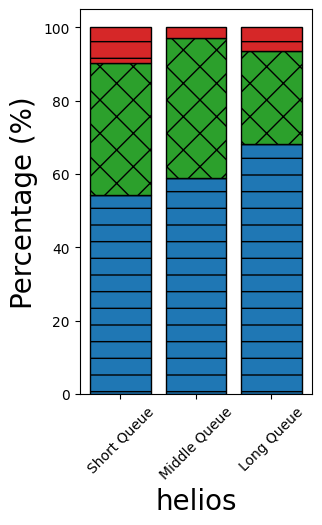

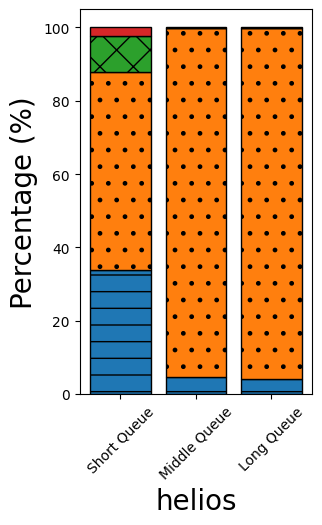

In [113]:
bars = [1, 1, 8, 256]
plot_util_node(queue_node_user, hl_df, bars, "all", "helios")
bars = [60, 3600, 3600*24, 1000000000]
plot_util_node(queue_time_user, hl_df, bars, "all", "helios")

In [114]:
phi_queue_time, phi_queue_time_user,phi_queue_node_user = analyze_queue_and_user_behavior(philly_df, gpu=True)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000


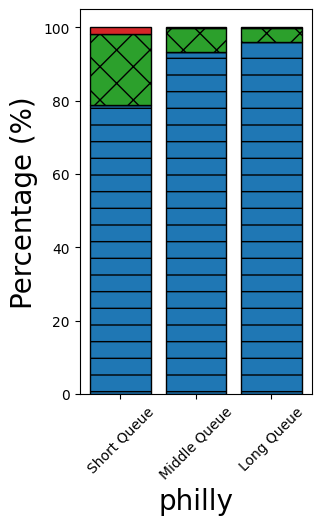

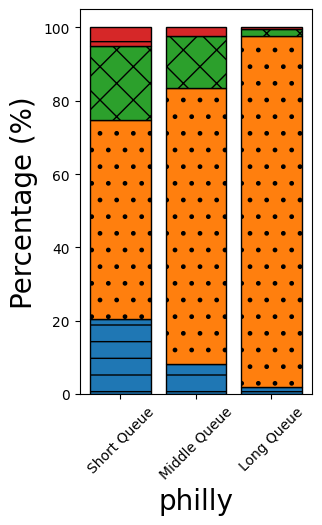

In [115]:
bars = [1, 1, 8, 256]
plot_util_node(phi_queue_node_user, philly_df, bars, "all", "philly")
bars = [60, 3600, 3600*24, 10000000]
plot_util_node(phi_queue_time_user, philly_df, bars, "all", "philly")

0
10000
20000


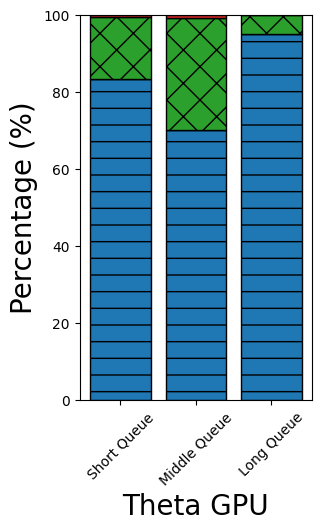

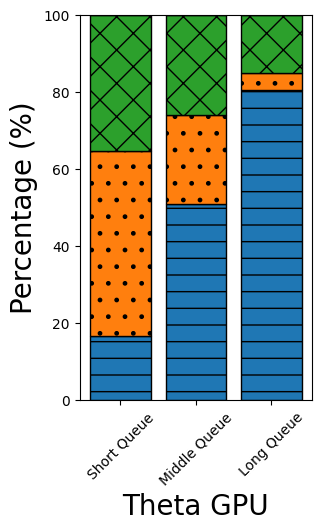

In [116]:
th_gpu_queue_time, th_gpu_queue_time_user, th_gpu_queue_node_user = analyze_queue_and_user_behavior(th_gpu_df, gpu=True)

bars = [1, 1, 8, 256]
plot_util_node(th_gpu_queue_node_user, th_gpu_df, bars, "all", "Theta GPU")
bars = [60, 3600, 3600*24, 1000000000]
plot_util_node(th_gpu_queue_time_user, th_gpu_df, bars, "all", "Theta GPU")

# UBC - Correlation Between Job Run Time And Job Status

In [117]:
from matplotlib import ticker as mticker
import seaborn as sns

def analyze_attribute_per(u, data):
    rows = list(data.groupby(u).count().sort_values(by="job", ascending=False).index[:10])
    job_counts = list(data.groupby(u).count().sort_values(by="job", ascending=False)["job"][:10])
    sum_of_node_hour = [data.groupby(u).sum()["node_hour"].loc[i]//3600 for i in rows]
    mean_nodes = [data.groupby(u).mean()["node_num"].loc[i] for i in rows]
    mean_run_time = [data.groupby(u).mean()["run_time"].loc[i] for i in rows]
    temp_df = pd.DataFrame(list(zip(rows, job_counts, sum_of_node_hour, mean_nodes, mean_run_time)),
                           columns=[u, "job_count", "sum_of_node_hour", "mean_nodes", "mean_run_time"])
    return temp_df

def analyze_attribute_per_ml(u, data, status=["Pass","Failed","Killed"]):
    rows = list(data.groupby(u).count().sort_values(by="job", ascending=False).index[:10])
    job_counts = list(data.groupby(u).count().sort_values(by="job", ascending=False)["job"][:10])
    sum_of_node_hour = [data.groupby(u).sum()["node_hour"].loc[i]//3600 for i in rows]
    mean_nodes = [data.groupby(u).mean()["node_num"].loc[i] for i in rows]
    mean_run_time = [data.groupby(u).mean()["run_time"].loc[i] for i in rows]
    st0_run_time = [data.groupby([u, "state"]).mean()["run_time"].loc[i].get(status[0],0) for i in rows]
    st1_run_time = [data.groupby([u, "state"]).mean()["run_time"].loc[i].get(status[1],0) for i in rows]
    st2_run_time = [data.groupby([u, "state"]).mean()["run_time"].loc[i].get(status[2],0) for i in rows]

    temp_df = pd.DataFrame(list(zip(rows, job_counts, sum_of_node_hour, mean_nodes, mean_run_time, st0_run_time,
                                   st1_run_time, st2_run_time )),
                           columns=[u, "job_count", "sum_of_node_hour", "mean_nodes", "mean_run_time", 
                                    "mean_run_time ({})".format(status[0]),
                                   "mean_run_time ({})".format(status[1]),
                                   "mean_run_time ({})".format(status[2])])
    return temp_df

def plot_attribute_per_ml(u, data, state="state", status=["Pass","Failed","Killed"],all_user=False):
    plt.style.use("default")
    rows = list(data.groupby(u).sum().sort_values(by="node_hour", ascending=False).index[:3])
    if all_user:
        mean_run_time = [data["run_time"]]
        st0_run_time = [data.groupby([state])["run_time"].apply(list).get(status[0],0)]
        st1_run_time = [data.groupby([state])["run_time"].apply(list).get(status[1],0)]
        st2_run_time = [data.groupby([state])["run_time"].apply(list).get(status[2],0)]
        fig, axes = plt.subplots(1, 1, figsize=(4, 3))

        for index, i in enumerate(zip(st0_run_time, st1_run_time, st2_run_time)):
            k = [np.log10(np.array(j)+1) for j in i]
            sns.violinplot(data=k,ax=axes, scale="width")
            
        ax = axes
        ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))
        ymin, ymax = ax.get_ylim()
        tick_range = np.arange(np.floor(ymin), ymax)
        ax.yaxis.set_ticks(tick_range)
        ax.yaxis.set_ticks([np.log10(x) for p in tick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)
        ax.yaxis.grid(True)
        ax.set_xticks([y for y in range(3)])
        ax.set_xticklabels([ "Pass", "Failed", "Killed"], fontsize=24)
        ax.set_ylabel('Job Run time (s)', fontsize=20)
    else:
        mean_run_time = [data.groupby(u)["run_time"].apply(list).loc[i] for i in rows]
        st0_run_time = [data.groupby([u, state])["run_time"].apply(list).loc[i].get(status[0],0) for i in rows]
        st1_run_time = [data.groupby([u, state])["run_time"].apply(list).loc[i].get(status[1],0) for i in rows]
        st2_run_time = [data.groupby([u, state])["run_time"].apply(list).loc[i].get(status[2],0) for i in rows]
        fig, axes = plt.subplots(1, 3, figsize=(12, 3))

        for index, i in enumerate(zip(st0_run_time, st1_run_time, st2_run_time)):
            k = [np.log10(np.array(j)+1) for j in i]
            sns.violinplot(data=k,ax=axes[index%3], scale="width")
            
        for index, ax in enumerate(axes.flatten()):
            ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))
            ymin, ymax = ax.get_ylim()
            tick_range = np.arange(np.floor(ymin), ymax)
            ax.yaxis.set_ticks(tick_range)
            ax.yaxis.set_ticks([np.log10(x) for p in tick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True,)
            ax.yaxis.grid(True)
            ax.set_xticks([y for y in range(3)])
            ax.set_xticklabels([ "Pass", "Failed", "Killed"], fontsize=15)
            ax.set_xlabel('User '+str(index+1), fontsize=20)

            if index == 0:
                ax.set_ylabel('Job Run time (s)', fontsize=20)
    plt.show()

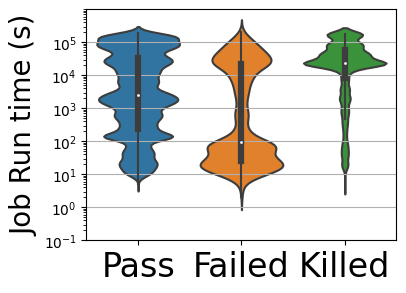

In [118]:
plot_attribute_per_ml("user", data=bw_df, state="new_status", all_user=True)

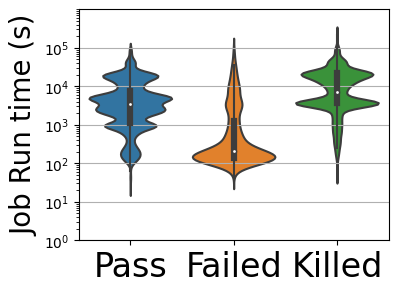

In [119]:
plot_attribute_per_ml("user", data=mira_df_2, state="new_status", all_user=True)

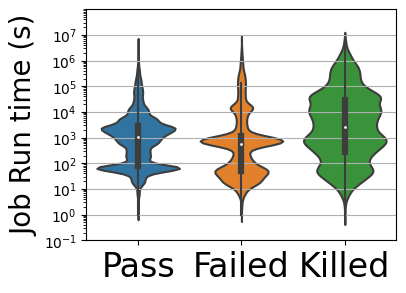

In [120]:
plot_attribute_per_ml("user", data=philly_df, state="state", all_user=True)

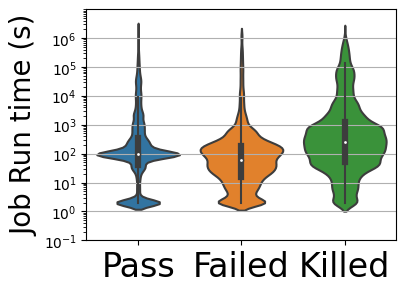

In [121]:
plot_attribute_per_ml("user", data=hl_df, state="state", all_user=True)

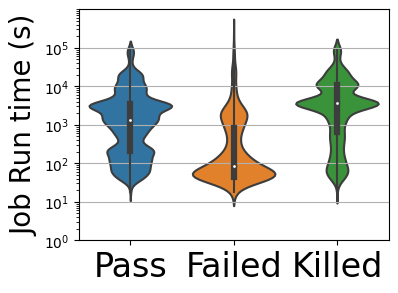

In [122]:
plot_attribute_per_ml("user", data=th_df, state="new_status", all_user=True)

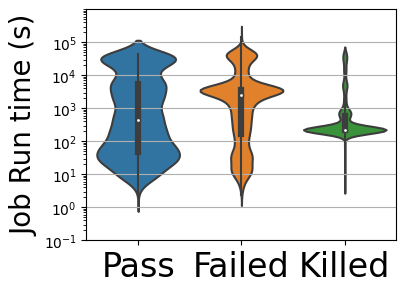

In [123]:
plot_attribute_per_ml("user", data=th_gpu_df, state="new_status", all_user=True)


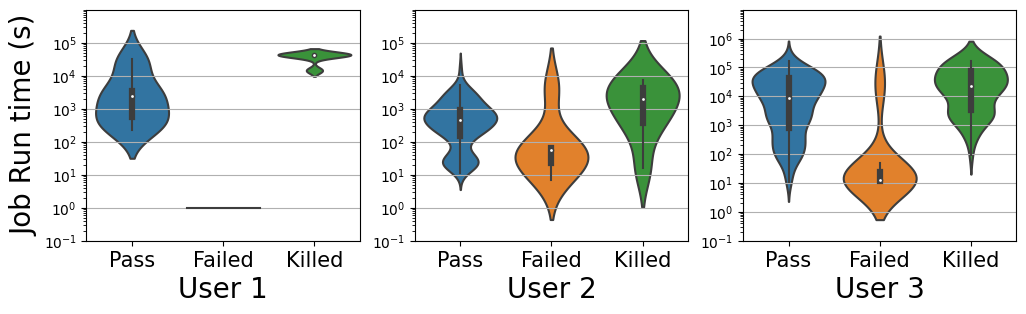

In [124]:
plot_attribute_per_ml("user", data=bw_df, state="new_status", all_user=False) 

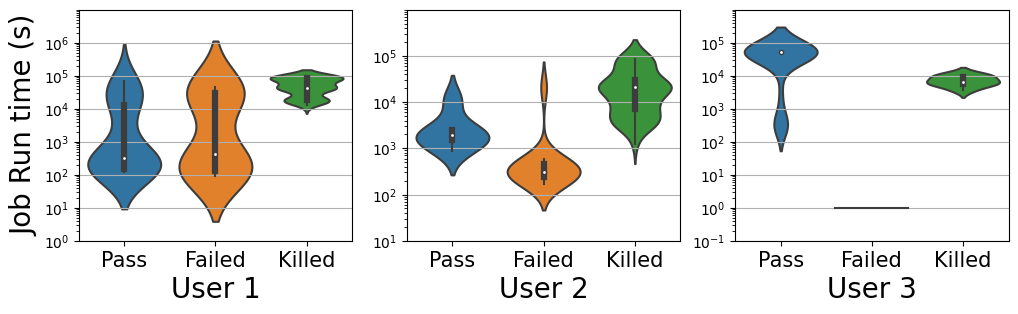

In [125]:
plot_attribute_per_ml("user", data=mira_df_2, state="new_status", all_user=False) 

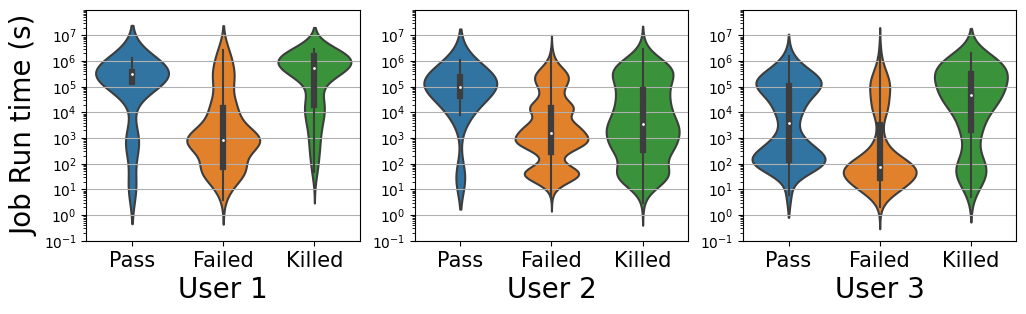

In [126]:
plot_attribute_per_ml(u="user", data=philly_df, status=["Pass", "Failed", "Killed"]) 

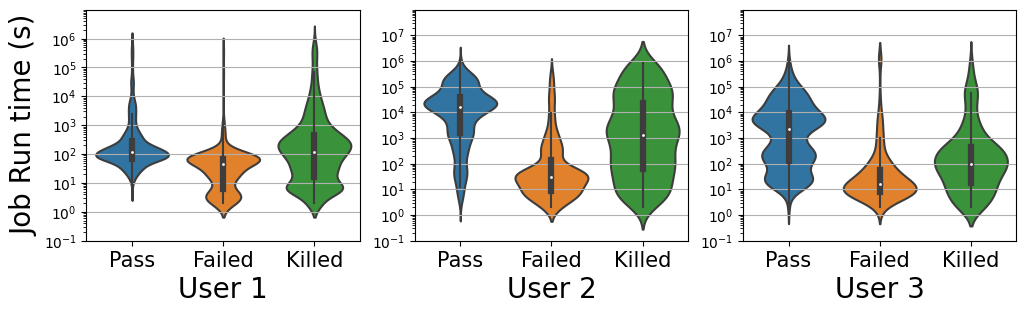

In [127]:
plot_attribute_per_ml("user", data=hl_df) 

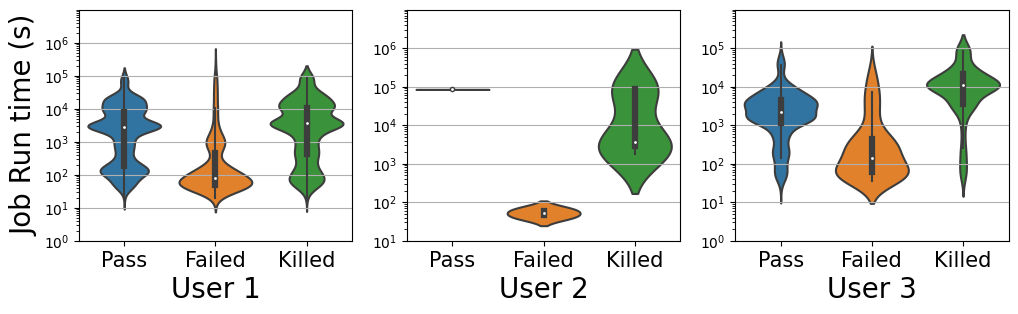

In [128]:
plot_attribute_per_ml("user", data=th_df, state="new_status", all_user=False) 

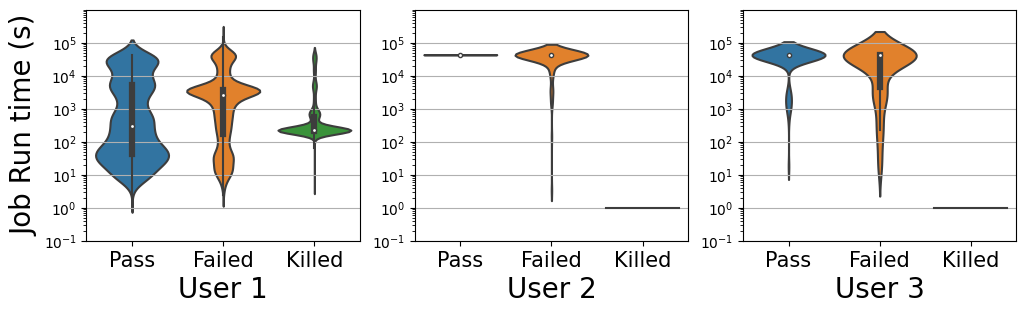

In [129]:
plot_attribute_per_ml("user", data=th_gpu_df, state="new_status", all_user=False) 

# JGC - Job Run Time - CDF

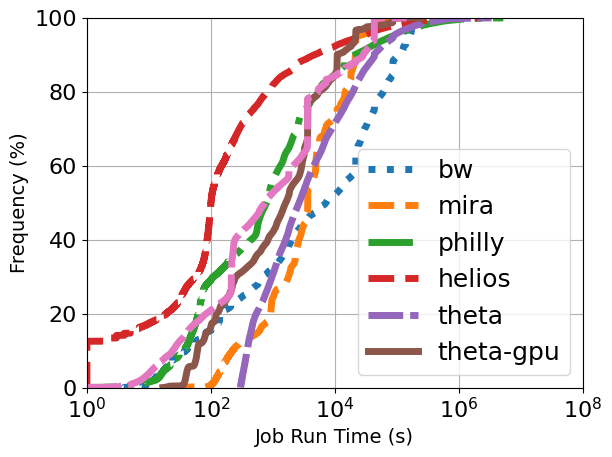

In [130]:
plt.style.use("default")
plot_cdf(bw_df["run_time"], 1000,"Time (s)", linestyle=":")
plot_cdf(mira_df_2["run_time"], 1000,"Time (s)", linestyle="--")
plot_cdf(philly_df["run_time"], 1000,"Time (s)", linestyle="-.")
plot_cdf(hl_df["run_time"], 10009999,"Job Run Time (s)", linestyle="--")
plot_cdf(sc_df["run_time"], 10009999,"Job Run Time (s)", linestyle=(1, (6,1)))
plot_cdf(th_df["run_time"], 1000, "Job Run Time (s)", linestyle="-")
plot_cdf(th_gpu_df["run_time"], 1000, "Job Run Time (s)", linestyle=(0, (5, 1)))
plt.rc('legend',fontsize=18)
plt.legend(["bw", "mira", "philly","helios", "theta", "theta-gpu"])
plt.xscale("log")

# JGC - Job Arrival Pattern - Job Arrival Interval

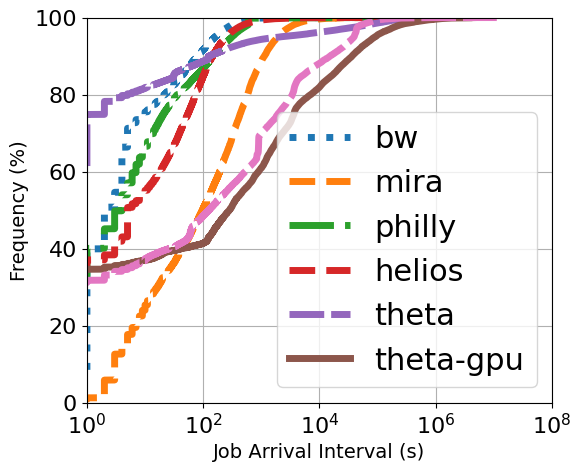

In [131]:
def get_interval(a, peak=False):
    def get_time_of_day2(time):
        time = datetime.fromtimestamp(time)
        return (time.hour + (time.minute>30))%24
    if peak:
        z = a.apply(get_time_of_day2)
        b = a-a.shift(1)
        c = b[(z>=8) & (z<=17)]
        return c
    return a-a.shift(1)
plt.style.use("default")
plt.figure(figsize=[6.,5])
plot_cdf(get_interval(bw_df["submit_time"]), 1000,"Time (s)", linestyle=":")
plot_cdf(get_interval(mira_df_2["submit_time"]), 1000,"Time (s)", linestyle="--")
plot_cdf(get_interval(philly_df["submit_time"]), 1000,"Time (s)", linestyle="-.")
plot_cdf(get_interval(hl_df["submit_time"]), 10009999,"Job Arrival Interval (s)", linestyle="--")
plot_cdf(get_interval(sc_df["submit_time"]), 10009999,"Job Arrival Interval (s)", linestyle=(1, (6,1)))
plot_cdf(get_interval(th_df["submit_time"]), 100099,"Job Arrival Interval (s)", linestyle="-")
plot_cdf(get_interval(th_gpu_df["submit_time"]), 100099,"Job Arrival Interval (s)", linestyle=(0, (5, 1)))
plt.rc('legend',fontsize=22)
plt.legend(["bw", "mira", "philly","helios", "theta", "theta-gpu"])
plt.xscale("log")

# JGC - Job Waiting Time - CDF of Wait Time

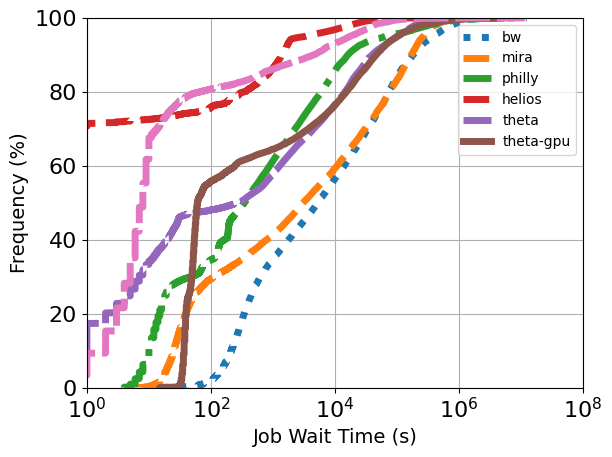

In [132]:
plot_cdf(bw_df["wait_time"], 100000, "Job Wait Time (s)", linestyle=":")
plot_cdf(mira_df_2["wait_time"], 100000, "Job Wait Time (s)", linestyle="--")
plot_cdf(philly_df["wait_time"], 100000, "Job Wait Time (s)", linestyle="-.")
plot_cdf(hl_df["wait_time"], 100000, "Job Wait Time (s)", linestyle="--")
plot_cdf(sc_df["wait_time"], 100000, "Job Wait Time (s)", linestyle=(1, (6,1)))
plot_cdf(th_df["wait_time"], 100000, "Job Wait Time (s)", linestyle="-")
plot_cdf(th_gpu_df["wait_time"], 100000, "Job Wait Time (s)", linestyle=(0, (5, 1)))
plt.legend(["bw", "mira", "philly","helios", "theta", "theta-gpu"])
plt.xscale("log")
plt.rc('legend',fontsize=23)

# JGC - Job Waiting Time - CDF of Turnaround Time

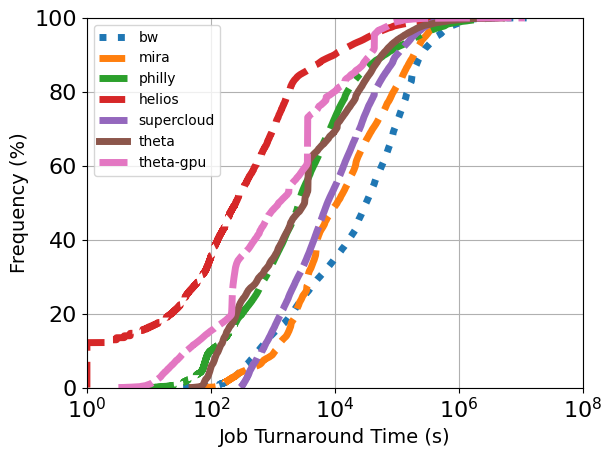

In [133]:
plot_cdf(bw_df["wait_time"]+bw_df["run_time"], 100000, "Job Wait Time (s)", linestyle=":")
plot_cdf(mira_df_2["wait_time"]+mira_df_2["run_time"], 100000, "Job Wait Time (s)", linestyle="--")
plot_cdf(philly_df["wait_time"]+philly_df["run_time"], 100000, "Job Wait Time (s)", linestyle="-.")
plot_cdf(hl_df["wait_time"]+hl_df["run_time"], 100000, "Job Turnaround Time (s)", linestyle="--")
plot_cdf(sc_df["wait_time"]+sc_df["run_time"], 100000, "Job Turnaround Time (s)", linestyle=(1, (6,1)))
plot_cdf(th_df["wait_time"]+th_df["run_time"], 100000, "Job Turnaround Time (s)", linestyle="-")
plot_cdf(th_gpu_df["wait_time"]+th_gpu_df["run_time"], 100000, "Job Turnaround Time (s)", linestyle=(0, (5, 1)))
plt.legend(["bw","mira", "philly","helios", "supercloud", "theta", "theta-gpu"])
plt.xscale("log")
plt.rc('legend',fontsize=23)

# JGC - Job Arrival Pattern - Daily Submit Pattern

In [134]:
def get_time_of_day(time, timestamp=True):
    if timestamp:
        time = datetime.fromtimestamp(time)
    else:
        time = datetime.strptime(time, '%Y-%m-%d %H:%M:%S')
    return (time.hour + (time.minute>30))%24, datetime.strftime(time, '%Y-%m-%d')

def get_day_of_week(time):
    time = datetime.fromtimestamp(time)
    return time.isocalendar()[2], time.isocalendar()[1]
    
def plot_time_submit(submit_time, xlabel, ylabel="Number of Submitted Jobs", week=False, marker="o"):
    if week == True:
        time, days = list(zip(*[get_time_of_day(i) for i in submit_time]))
        dd = Counter()
        for i in time:
            dd[i] += 1
        keys = sorted(dd.keys())
        n = len(set(days))
    else:
        days, weeks = list(zip(*[get_day_of_week(i) for i in submit_time]))
        dd = Counter()
        for i in days:
            dd[i] += 1
        keys = sorted(dd.keys())
        n = len(set(weeks))
    plt.plot(keys, [np.array(dd[j])/n for j in keys], marker=marker, linewidth=3, markersize=12)
    

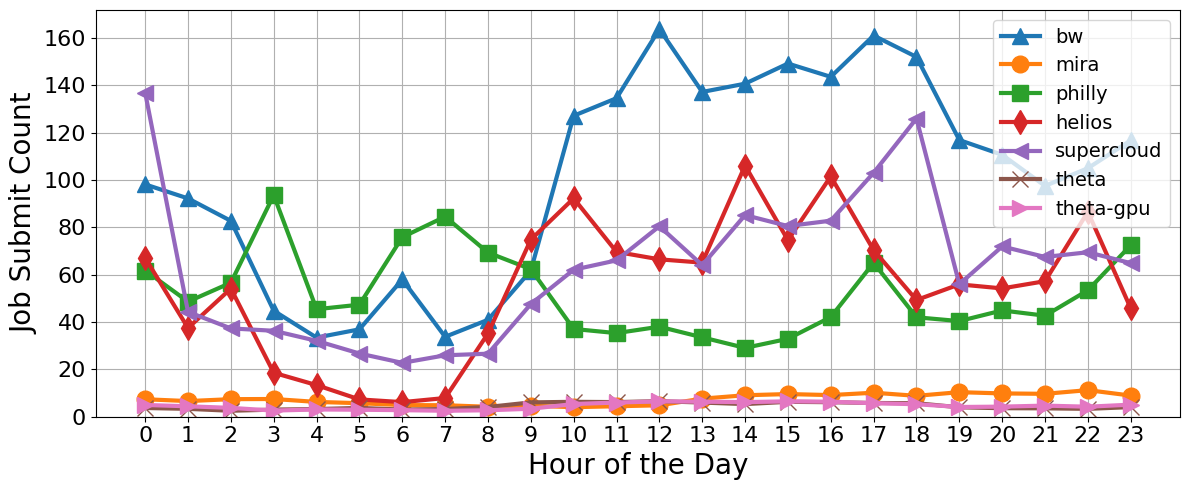

In [135]:
plt.figure(figsize=(12,5))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16) 
plot_time_submit(bw_df["submit_time"], xlabel="Hour of the Day", week=True,marker="^")
plot_time_submit(mira_df_2["submit_time"], xlabel="Hour of the Day", week=True, marker="o")
plot_time_submit(philly_df["submit_time"], xlabel="Hour of the Day", week=True, marker="s")
plot_time_submit(hl_df["submit_time"], xlabel="Hour of the Day", week=True, marker="d")
plot_time_submit(sc_df["submit_time"], xlabel="Hour of the Day", week=True, marker="<")
plot_time_submit(th_df["submit_time"], xlabel="Hour of the Day", week=True, marker="x")
plot_time_submit(th_gpu_df["submit_time"], xlabel="Hour of the Day", week=True, marker=">")
plt.xlabel("Hour of the Day", fontsize=20)
plt.ylabel("Job Submit Count", fontsize=20)
plt.ylim(bottom=0)
plt.tight_layout()
plt.grid(True)
plt.legend(["bw", "mira", "philly","helios","supercloud", "theta", "theta-gpu"],  prop={'size': 14})
plt.xticks(range(0, 24, 1))
plt.rc('legend',fontsize=20)

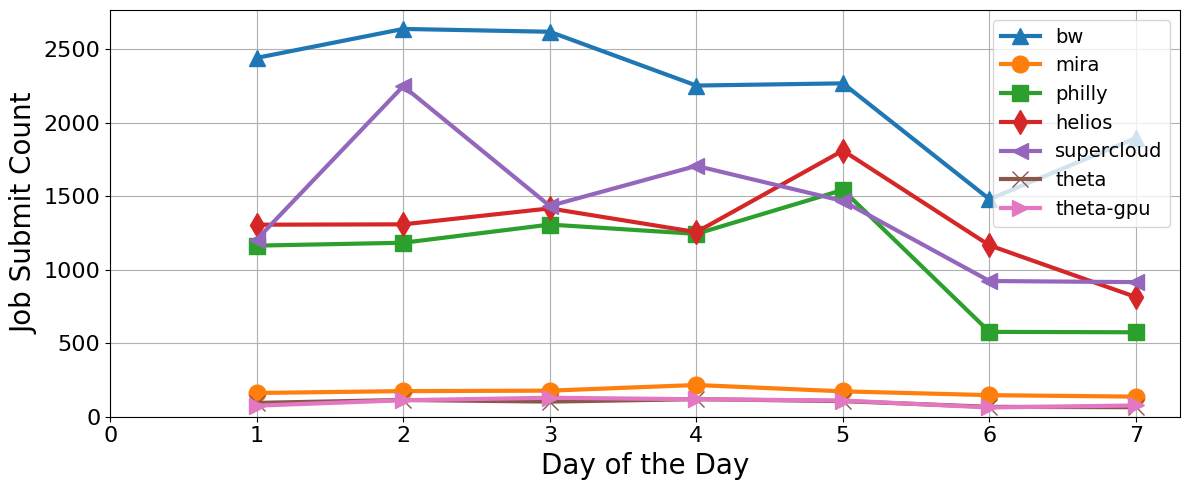

In [136]:
plt.figure(figsize=(12,5))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16) 
plot_time_submit(bw_df["submit_time"], xlabel="Day of the Day", week=False,marker="^")
plot_time_submit(mira_df_2["submit_time"], xlabel="Day of the Day", week=False, marker="o")
plot_time_submit(philly_df["submit_time"], xlabel="Day of the Day", week=False, marker="s")
plot_time_submit(hl_df["submit_time"], xlabel="Day of the Day", week=False, marker="d")
plot_time_submit(sc_df["submit_time"], xlabel="Day of the Day", week=False, marker="<")
plot_time_submit(th_df["submit_time"], xlabel="Day of the Day", week=False, marker="x")
plot_time_submit(th_gpu_df["submit_time"], xlabel="Day of the Day", week=False, marker=">")
plt.xlabel("Day of the Day", fontsize=20)
plt.ylabel("Job Submit Count", fontsize=20)
plt.ylim(bottom=0)
plt.tight_layout()
plt.grid(True)
plt.legend(["bw", "mira", "philly","helios", "supercloud", "theta", "theta-gpu"],  prop={'size': 14})
plt.xticks(range(0, 8, 1))
plt.rc('legend',fontsize=20)

# JGC - Job Run Time - Detailed Run Time Distribution

C:\Users\monis\AppData\Local\Temp\ipykernel_6524\3606864597.py:39: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "dils". Passing invalid values is deprecated since 3.4 and will become an error in 3.8.
  plt.bar(x_value+5*width/2, th, width,edgecolor='black', hatch="solid")
C:\Users\monis\AppData\Local\Temp\ipykernel_6524\3606864597.py:40: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values ">". Passing invalid values is deprecated since 3.4 and will become an error in 3.8.
  plt.bar(x_value+7*width/2, th_gpu, width,edgecolor='black', hatch=">")


Text(0.5, 0, 'Job Run Time (s)')

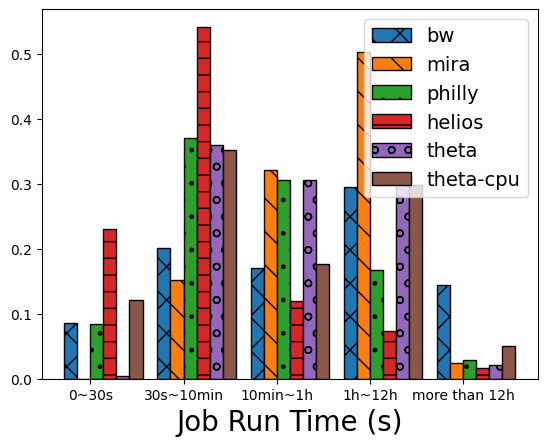

In [137]:
def lt_xs(data, t1, t2):
    lt10min_jobs_num = len(data[data<t2][data>=t1])
    all_jobs_num = len(data)
    return lt10min_jobs_num/all_jobs_num
  
def lt_xs_all(t1, t2):
    res = []
    res.append(lt_xs(bw_df["run_time"], t1, t2))
    res.append(lt_xs(mira_df_2["run_time"], t1, t2))
    res.append(lt_xs(philly_df["run_time"], t1, t2))
    res.append(lt_xs(hl_df["run_time"], t1, t2))
    res.append(lt_xs(th_df["run_time"], t1, t2)) 
    res.append(lt_xs(th_gpu_df["run_time"], t1, t2))  
    return res

x = [0, 30, 600, 3600, 12*3600, 100000]
x_value = np.array([1, 2, 3, 4, 5])
labels = ['0~30s', '30s~10min', '10min~1h', '1h~12h', "more than 12h"]
bw = []
mr = []
ply = []
hl = []
th = []
th_gpu = []
width = 0.14
for i in range(1, len(x)):
    res = lt_xs_all(x[i-1], x[i])
    bw.append(res[0])
    mr.append(res[1])
    ply.append(res[2])
    hl.append(res[3])
    th.append(res[4])
    th_gpu.append(res[5])
    
plt.bar(x_value-3*width/2, bw, width, edgecolor='black', hatch="x")
plt.bar(x_value-width/2, mr, width,edgecolor='black', hatch="\\")
plt.bar(x_value+width/2, ply, width,edgecolor='black', hatch=".")
plt.bar(x_value+3*width/2, hl, width,edgecolor='black', hatch="-")
plt.bar(x_value+5*width/2, th, width,edgecolor='black', hatch="solid")
plt.bar(x_value+7*width/2, th_gpu, width,edgecolor='black', hatch=">")
plt.xticks(x_value, labels)
plt.legend(["bw", "mira", "philly","helios", "theta", "theta-cpu"], prop={'size': 14})
plt.xlabel("Job Run Time (s)", fontsize=20)